<a href="https://colab.research.google.com/github/rushikeshnaik779/EDA/blob/master/Plotly_%26_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 

# basic Visualization tools 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

plt.rcParams['figure.dpi']= 300


In [2]:
from google.colab import files 

uploaded = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [3]:
import io
data = pd.read_csv(io.BytesIO(uploaded['StudentsPerformance.csv']))

In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
!pip install seaborn
import seaborn as sns
sns.set_style("whitegrid")

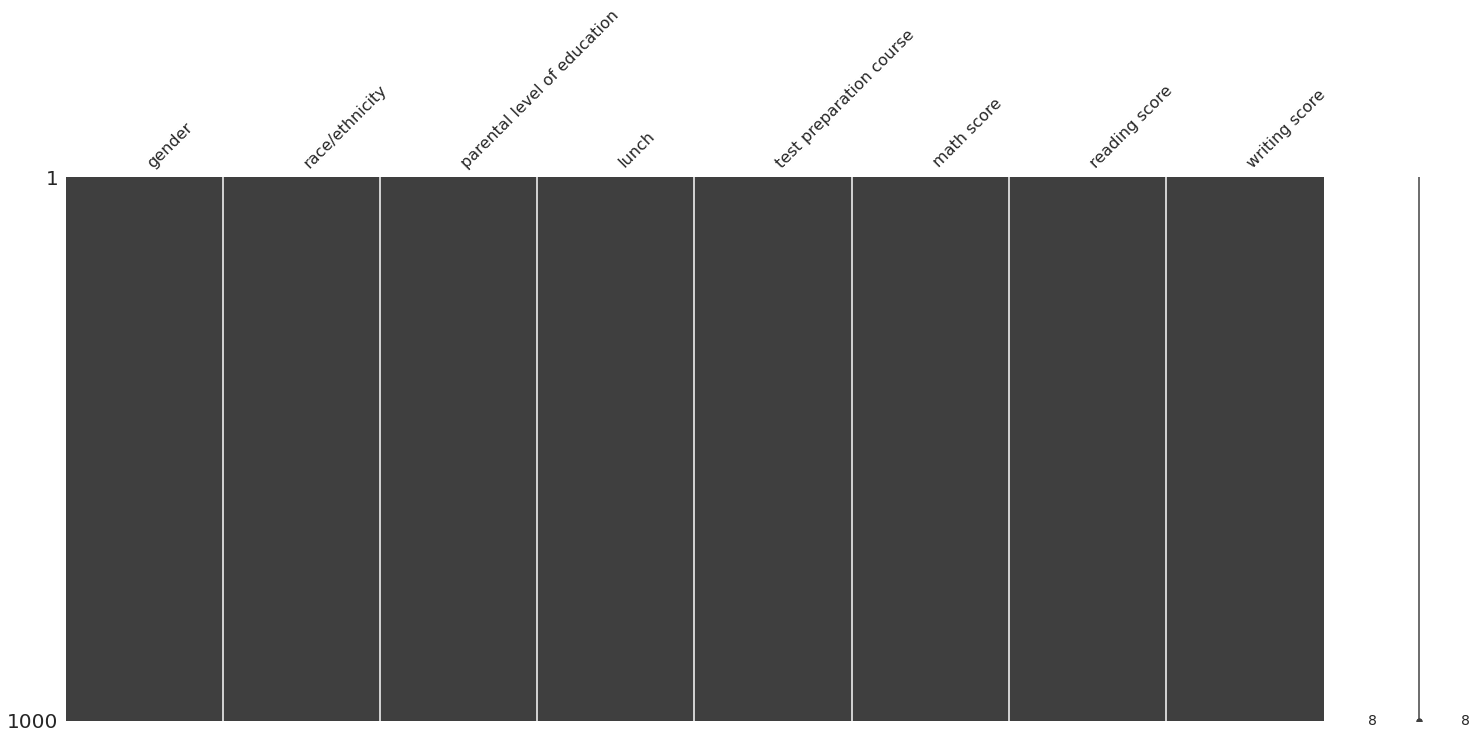

In [6]:
# checking NULL Data 

import missingno as msno 
msno.matrix(data)

In [7]:
# table view 
# Default notebook 
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
display(data)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [9]:
# Plotly go.Table 
import plotly.graph_objects as go 

fig = go.Figure()

fig.add_trace(
    go.Table(header=dict(values = data.columns), 
             cells = dict(values = data.head(3).T))
)

fig.show()

No handles with labels found to put in legend.


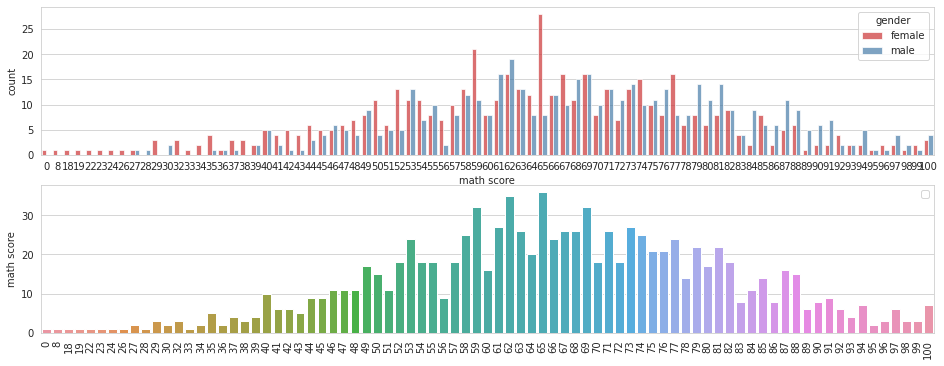

In [10]:
# Count plot 
## Seaborn : countplot, barplot + value_counts()

# TIPS
# - if you want to make it vertical, replace x by y. 
# - use alpha parameter to set opacity for more readable plot 
# - use hue to find features' trend 
# - use plt.xticks or plt.yticks to rotation xaxis label





fig, ax  = plt.subplots(2, 1, figsize=(16, 6))
# type 1 : use hue parameter 
sns.countplot(x='math score', data=data, hue='gender', palette='Set1',
              alpha=0.7, ax=ax[0])
plt.legend()

# type 2 : user value_counts + bar plot

sns.barplot(x=data['math score'].value_counts().index,
            y=data['math score'].value_counts(), ax=ax[1])
plt.xticks(rotation='vertical')

plt.show()


In [11]:
# plotly: px.Histogram , go.Histogram

In [12]:
# plotly doesn't have coutplot but with simple trick, we can make countplot
# (or You can use value_counts + bar trick again)

# plotly.express and plotly.graph_objects have histogram plot 
# we can set x & y parameter same feature (it means y is number of x )
# And set color like hue.
# you can change barmode as group 




In [13]:
import plotly.express as px

# type 1 stacked graph (default)
fig = px.histogram(data, x='math score', y='math score', color ='gender')
fig.show()

# type 2 group 
fig = px.histogram(data, x='math score', y='math score', color='gender')
fig.update_layout(barmode='group')
fig.show()

In [14]:
fig = px.histogram(data, x='math score', y='math score', color='gender',
                   marginal='box', # or violin, rug
                   )
fig.show()

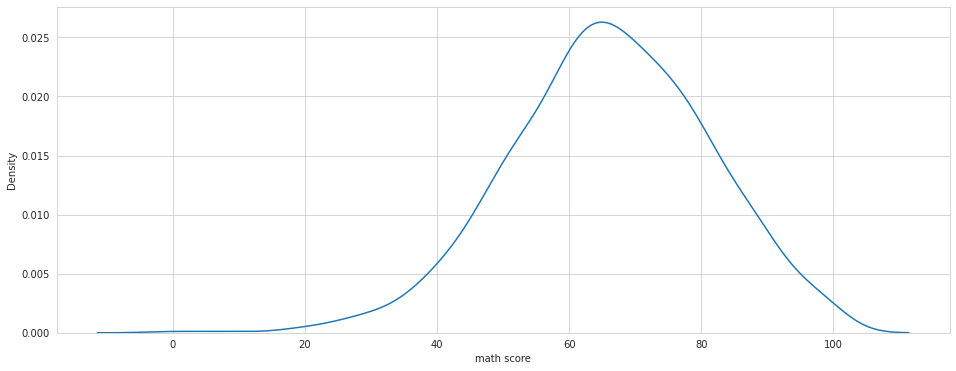

In [15]:
# Distplot 
# Seaborn : distplot 
# - Distplot : Flexibly plot a univariate distribution of observation
# distplot is similar to countplot because countplot is a histogram according to 
# Frequency. 
# Basically you can look at it with histogram, so its easier to see tends that countplot 
# you cannot set the hue  separatly so you need to draw the graphs individually (You can add label)







# type 1 default view 
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.kdeplot(data['math score'])
plt.show()

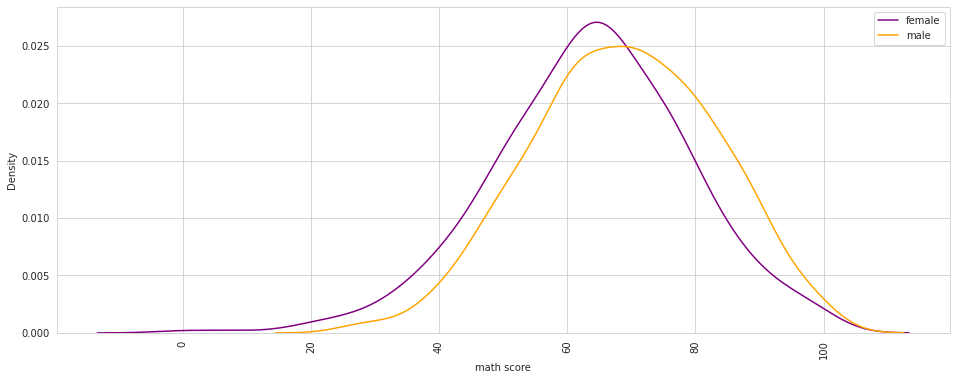

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.kdeplot(data[data['gender'] == 'female']['math score'], color='purple',
            ax=ax, label='female')
sns.kdeplot(data[data['gender'] == 'male']['math score'], color='orange', ax=ax,
            label = 'male')

plt.xticks(rotation='vertical')
plt.legend()
plt.show()

In [17]:
# Although extra, you can also add a mean line using matplotlib 


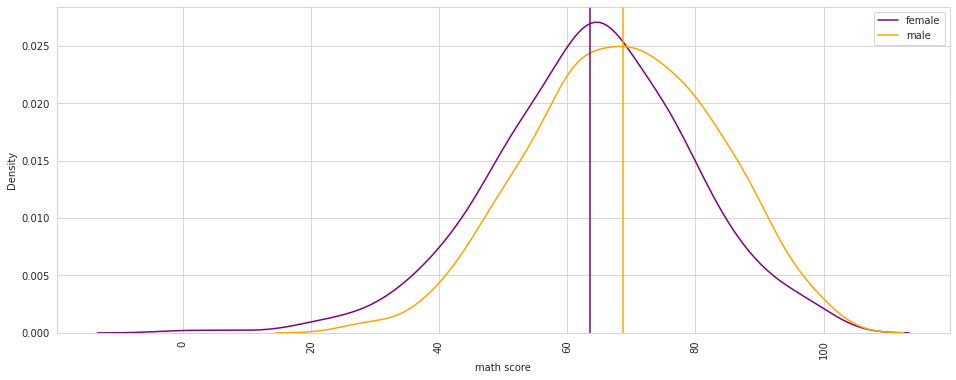

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.kdeplot(data[data['gender'] == 'female']['math score'], color='purple',
            ax=ax, label='female')

sns.kdeplot(data[data['gender'] == 'male']['math score'], color='orange',
            ax=ax, label='male')

plt.axvline(data[data['gender']=='female']['math score'].mean(), color='purple')
plt.axvline(data[data['gender']=='male']['math score'].mean(), color='orange')

plt.legend()
plt.xticks(rotation='vertical')
plt.show()

In [19]:
# type 1 : default 
import plotly.figure_factory as ff 

fig = ff.create_distplot([data[data['gender']=='male']['math score'], 
                          data[data['gender'] == 'female']['math score']], 
                         ['male', 'female'])

fig.show()

In [20]:
# you can set bins width and color 

# type 2 : add color and change bin width

fig = ff.create_distplot([data[data['gender'] =='male']['math score'],
                          data[data['gender'] == 'female']['math score']],
                         ['male', 'female'],
                         colors=['#2BCDC1', '#F66095'],
                         bin_size = [2,2]
                         )

fig.show()

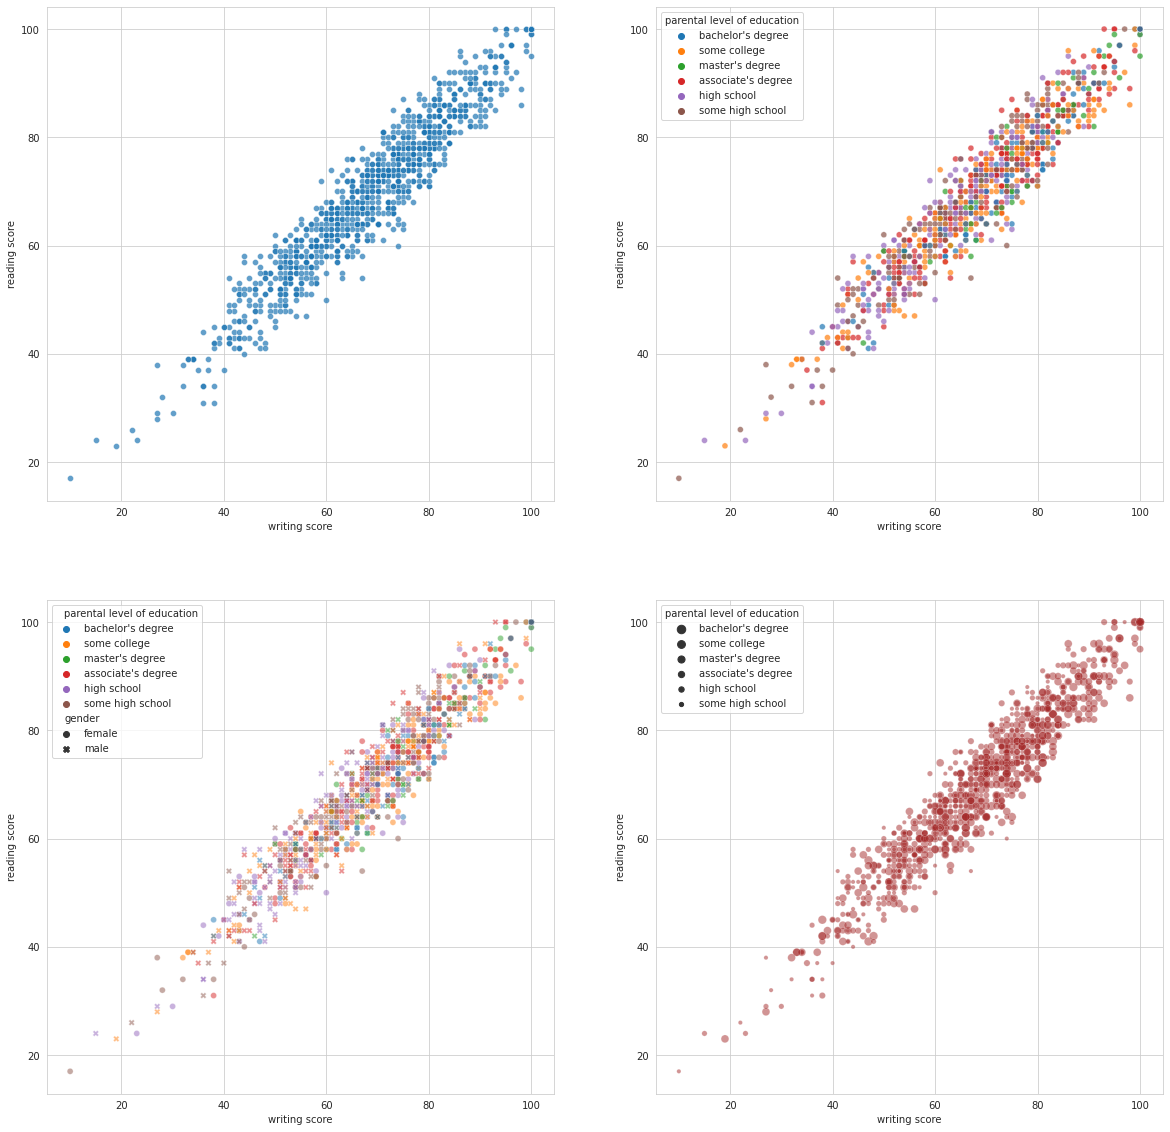

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

# type 1 : defaulter scatter plot 
sns.scatterplot(data=data, x='writing score', y='reading score', alpha=0.7, ax=ax[0][0])

# type 2 : with hue 
sns.scatterplot(data=data, x='writing score', y='reading score', hue='parental level of education', alpha=0.7, ax=ax[0][1])


#type 3 : with style and color 
sns.scatterplot(data=data, x='writing score', y='reading score', hue='parental level of education', style='gender', color='royalblue', alpha=0.5, ax=ax[1][0])

# type 4 with size and color 
sns.scatterplot(data=data, x='writing score', y='reading score', size='parental level of education', color='brown', alpha=0.5, ax=ax[1][1])

plt.show()

In [22]:
# if you use them all together, you can plot high-dimensional data on a 
# two-dimensional plane.

# However, the data is not very efficient, so I recommend using it occasionally 

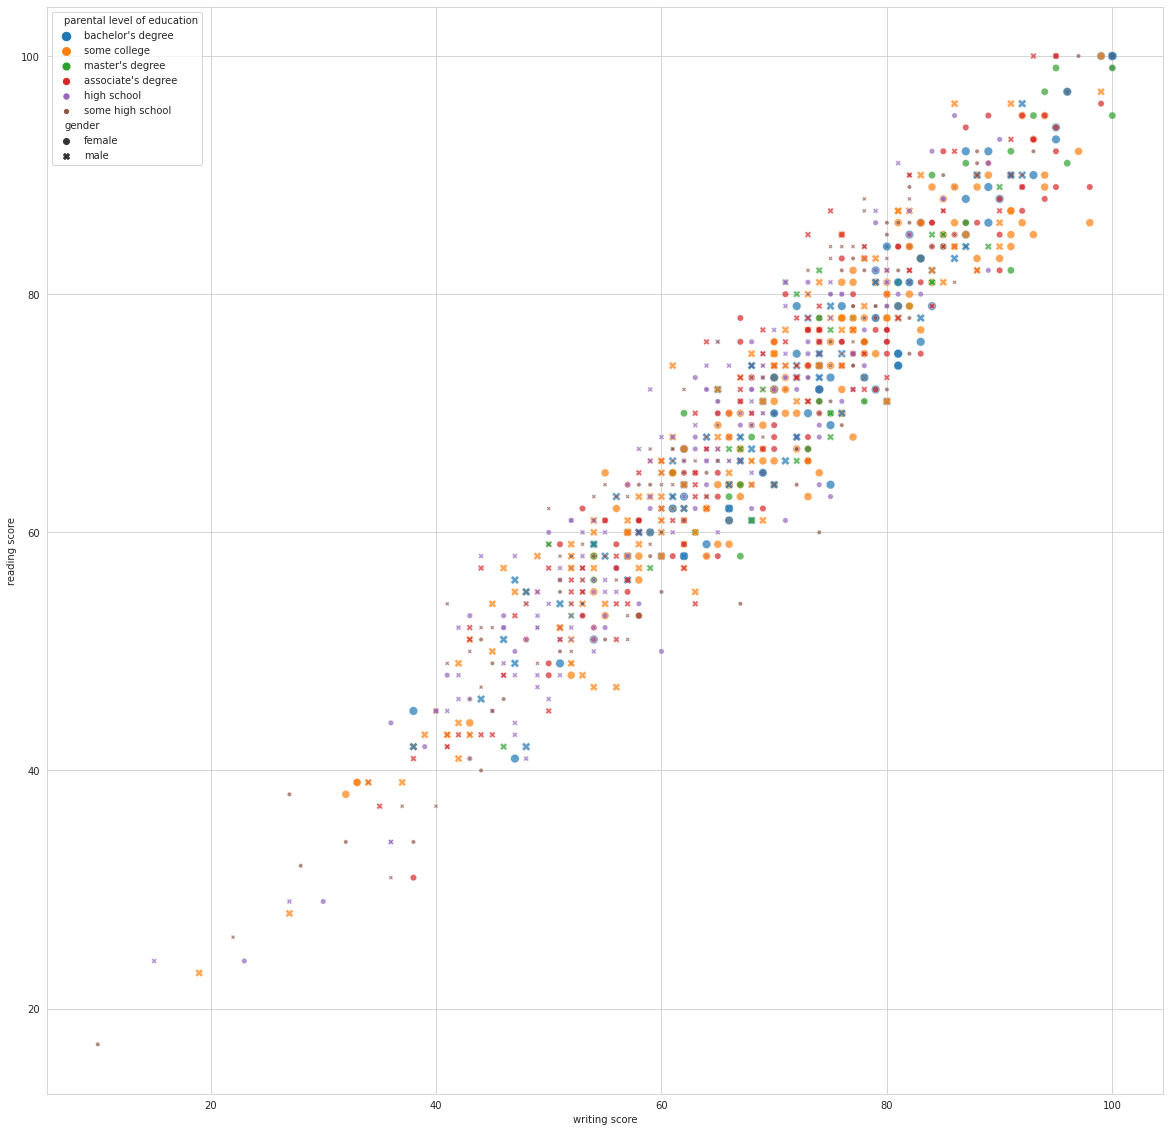

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
sns.scatterplot(data=data, x='writing score', y='reading score', style='gender',
                hue='parental level of education', size='parental level of education',
                alpha=0.7)
plt.show()

In [25]:
# To use size, the feature must be numeric. So let's encode "parental level of
# education"

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

data['parental level of education'] = LE.fit_transform(data['parental level of education'])

In [26]:
fig = px.scatter(data, x='writing score', y='reading score',
                 color='parental level of education', 
                 size = 'parental level of education',)

fig.show()

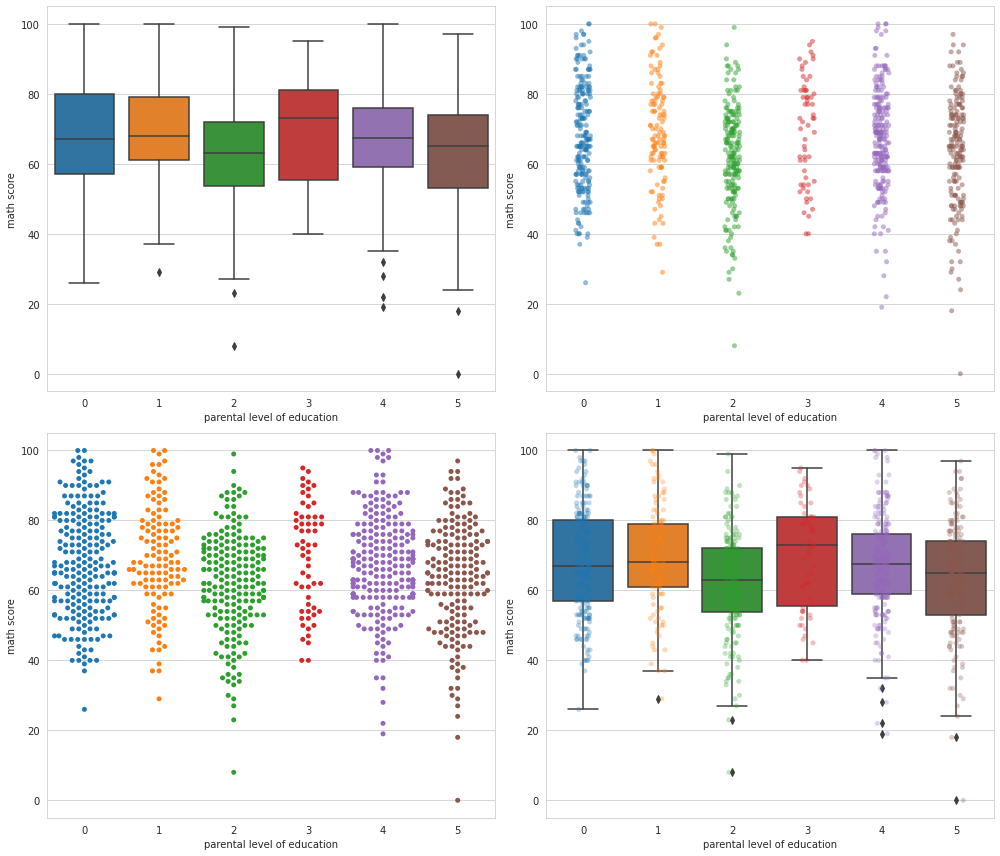

In [28]:
# type 1 : default boxplot & stripplot 

fig, ax= plt.subplots(2, 2, figsize=(14, 12))

# boxplot 
sns.boxplot(x='parental level of education', y='math score', data=data,
            ax=ax[0][0])

# stripplot 
sns.stripplot(x='parental level of education', y='math score', data=data,
              ax=ax[0][1], alpha=0.5)

# swarmplot 

sns.swarmplot(x='parental level of education', y='math score', data=data,
              ax=ax[1][0])

# both 
sns.boxplot(x='parental level of education', y='math score', data=data,
            ax=ax[1][1])
sns.stripplot(x='parental level of education', y='math score', data=data,
              ax=ax[1][1], alpha=0.3)

plt.tight_layout()
plt.show()

In [29]:
# As with many other seaborn functions, you can add hue parameters 

#type 2 : we can add hue parameter 


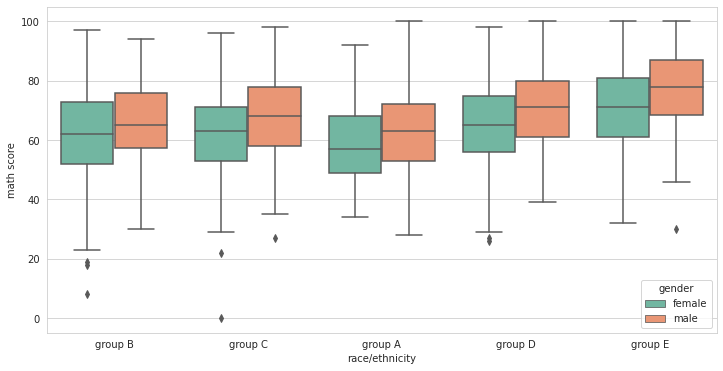

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.boxplot(x='race/ethnicity', y='math score', hue='gender', palette='Set2',
            data=data, ax=ax)
plt.show()

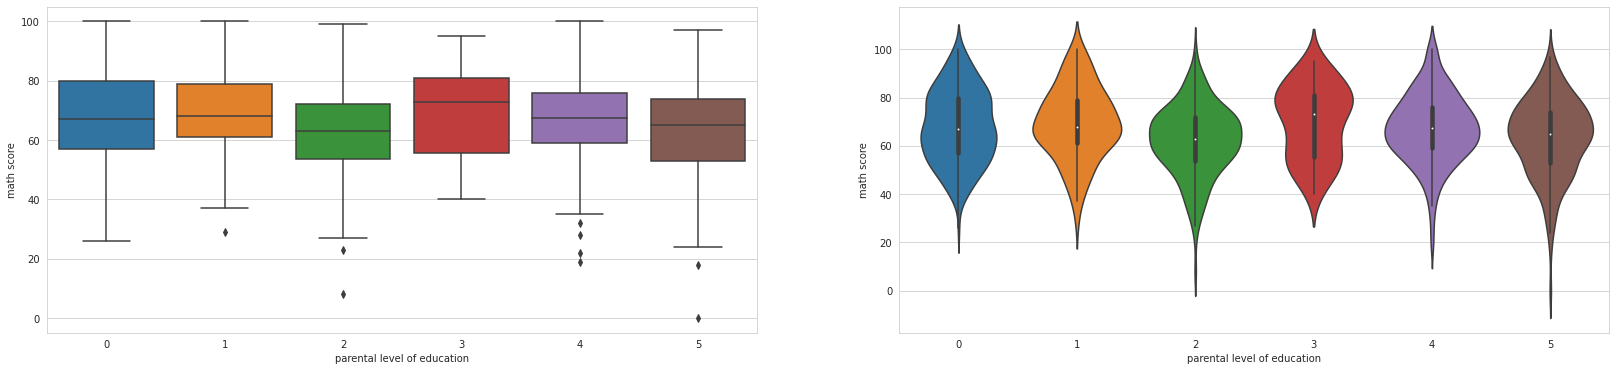

In [32]:
# VIOLIN PLOT 

# Seaborn Violinplot 
fig, ax = plt.subplots(1, 2, figsize=(28, 6))

# boxplot 
sns.boxplot(x='parental level of education', y='math score', data=data,
            ax=ax[0])

# violinplot 
sns.violinplot(x='parental level of education', y='math score', data=data,
               ax=ax[1])

plt.show()

In [33]:
# you can use hue parameter 
# and there are two views 
 
# - split : True
# - split : False(default)

